# Linear regression - One variable 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
#do plotting inline instead of in a seperate window.
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\dhala\\Desktop\\Coursera\\ML-1\\ex1\\ex1data1.txt",header=None,names=['population','profit'])


In [3]:
df.shape
df.head(5)


,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


<function matplotlib.pyplot.show>

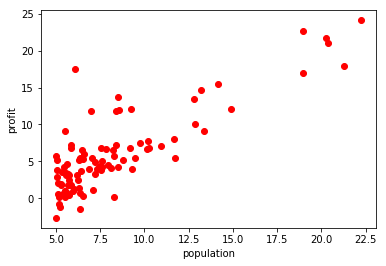

In [4]:

plt.plot(df['population'],df['profit'],'ro')
plt.xlabel('population')
plt.ylabel('profit')
plt.show


In [5]:
X = df.as_matrix(columns = ['Population'])
y = df.as_matrix(columns = ['Profit'])
m = X.shape[0]
n = X.shape[1] + 1
theta_initial = np.zeros(n)
Theta = np.zeros((X.shape[1],1))
print(theta_initial.shape)
print(X.shape)
print(Theta)

(2,)
(97, 1)
[[ 0.]]


## Compute gradient discent

## Hypothesis

In [6]:
def h(X,Theta):
    return np.dot(X,Theta)
    

In [7]:
def computeCost(X, y, Theta):
    m = len(y)
    err = ( h(X, Theta) - y)
    return (1.0 / (2.0 * m)) * (np.dot(err.T,err))



In [8]:
#print(computeCost(X,y,theta_initial))

In [9]:
data = np.loadtxt('C:\\Users\\dhala\\Desktop\\Coursera\\ML-1\\ex1\\ex1data1.txt', delimiter=',')

X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]
Theta = np.zeros((X.shape[1],1))
m = len(y)
#Theta=np.zeros(2)
#Theta=[[0],[0]]
print(X.shape)
#print(y)
#print(initial_theta)
print(Theta)
#print(h(X,Theta))
print(computeCost(X,y,Theta))


(97, 2)
[[ 0.]
 [ 0.]]
[[ 32.07273388]]


In [10]:
print(computeCost(X,y,Theta))

[[ 32.07273388]]


In [11]:
def gradientDescent(X, y,Theta, num_iters=1500):
    alpha=0.01
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = np.dot(X,Theta)
        Theta = Theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, Theta)
    return(Theta, J_history)

theta:  [-3.63029144  1.16636235]


<function matplotlib.pyplot.show>

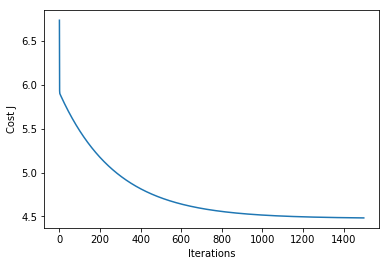

In [12]:
#fit=Gradient_descent(X,y,Theta)
#print("Thetas are: ", Theta[0,0], Theta[1,0])
theta , Cost_J = gradientDescent(X, y,Theta)
print('theta: ',theta.ravel())


plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');
plt.show

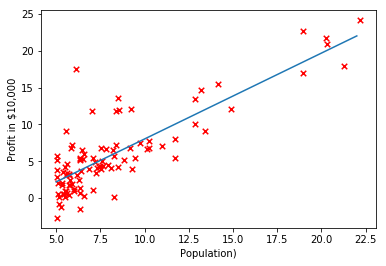

In [13]:

xx = np.arange(5,23)
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlabel('Population)')
plt.ylabel('Profit in $10,000')
plt.plot(xx,yy, label='Linear regression (Gradient descent)')


In [14]:
def getprofit(xx):
    yy = theta[0]+theta[1]*xx
    return yy


print(getprofit(3.5) * 10000)
print(getprofit(7)* 10000)
    

[ 4519.7678677]
[ 45342.45012945]


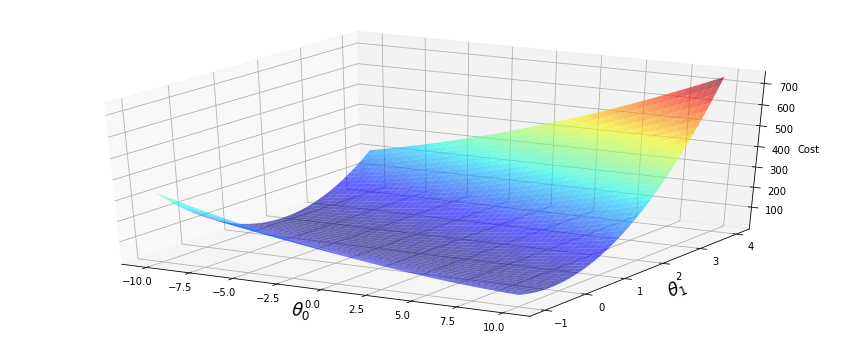

In [15]:
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = computeCost(X,y,[[xx[i,j]], [yy[i,j]]])
    
fig = plt.figure(figsize=(15,6))
ax = plt.axes(projection='3d')
ax.set_zlabel('Cost')
ax.set_xlabel(r'$\theta_0$', fontsize=17)
ax.set_ylabel(r'$\theta_1$', fontsize=17)
#ax.view_init(elev=15, azim=230)

p = ax.plot_surface(xx, yy, Z, rstride=1, cstride=1,alpha=0.6, cmap=plt.cm.jet)
